In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
df = pd.read_csv(r"C:\Users\joy\Downloads\storedata.csv")
df.head()

,Town,Country,Store ID,Manager name,Staff,Floor Space,Window,Car park,Demographic score,Location,40min population,30 min population,20 min population,10 min population,Store age,Clearance space,Competition number,Competition score,Performance
0,Swinton (Greater Manchester),UK,1437,Roger,9,18526,121,Yes,10,Retail Park,1288374,1138224,1006986,1002340,3,238,16,16,Good
1,Stamford,UK,1544,Ella,8,18569,121,Yes,11,Shopping Centre,1086225,1015321,1012182,1008436,4,384,15,19,Good
2,Skipton,UK,2039,Valentina,-2,12288,105,No,12,Retail Park,1595638,1281661,1104490,1011395,11,219,13,18,Bad
3,Stratton,UK,2055,Antonia,7,17092,117,No,14,High Street,1179395,1022959,1009496,1002169,5,261,15,12,Bad
4,Shepperton,UK,2141,Gabriel,7,11307,103,No,18,Retail Park,1398558,1085170,1003137,1002513,7,200,19,13,Bad


In [3]:
df.size

2584

In [4]:
df.shape

(136, 19)

In [5]:
df.columns

Index(['Town', 'Country', 'Store ID', 'Manager name', 'Staff', 'Floor Space',
       'Window', 'Car park', 'Demographic score', 'Location',
       '40min population', '30 min population', '20 min population',
       '10 min population', 'Store age', 'Clearance space',
       'Competition number', 'Competition score', 'Performance'],
      dtype='object')

In [6]:
df.isnull().sum()

Town                  0
Country               0
Store ID              0
Manager name          0
Staff                 0
Floor Space           0
Window                0
Car park              0
Demographic score     0
Location              0
40min population      0
30 min population     0
20 min population     0
10 min population     0
Store age             0
Clearance space       0
Competition number    0
Competition score     0
Performance           0
dtype: int64

In [7]:
df.dtypes

Town                  object
Country               object
Store ID               int64
Manager name          object
Staff                  int64
Floor Space            int64
Window                 int64
Car park              object
Demographic score      int64
Location              object
40min population       int64
30 min population      int64
20 min population      int64
10 min population      int64
Store age              int64
Clearance space        int64
Competition number     int64
Competition score      int64
Performance           object
dtype: object

In [9]:
df.duplicated().sum()

0

In [10]:
for i in df.columns:
    print(f"{i} : {df[i].nunique()}")

Town : 136
Country : 2
Store ID : 136
Manager name : 118
Staff : 8
Floor Space : 135
Window : 25
Car park : 4
Demographic score : 10
Location : 4
40min population : 136
30 min population : 136
20 min population : 136
10 min population : 136
Store age : 10
Clearance space : 90
Competition number : 10
Competition score : 10
Performance : 2


In [11]:
for i in df.columns:
    print(f"{i} : {df[i].unique()}")

Town : [' Swinton (Greater Manchester)' ' Stamford' ' Skipton' ' Stratton'
 ' Shepperton' ' Southwell' ' Swinton (South Yorkshire)' ' Sowerby Bridge'
 ' Sheffield' ' Stanley' ' Shepshed' ' Staines' ' Sutton' ' Stafford'
 ' Sawbridgeworth' ' Stocksbridge' ' Salcombe' ' Southminster' ' Slough'
 ' Sedgley' ' St Mawes' ' Sudbury' ' Steyning' ' Southampton' ' Snaith'
 ' Sampford Courtenay' ' Skelmersdale' ' Scunthorpe' ' Sunderland'
 ' Streatham' ' Saxmundham' ' Sandiacre' ' Stretford' ' St Austell'
 ' Stalbridge' ' Southwick' ' Shefford' ' Stanford-le-Hope' ' Swindon'
 ' Stainforth' ' St Helens' ' Stourbridge' ' Swadlincote' ' Sale'
 ' Seaham' ' Southwold' ' Shanklin' ' South Shields' ' Southport'
 ' Stalham' ' Shaw & Crompton' ' South Elmsall' ' St Blazey' ' Sherborne'
 ' Smethwick' ' Stow-on-the-Wold' ' Sandwich' ' Shaftesbury' ' Spalding'
 ' Stockton-on-Tees' ' Stroud' ' Scarborough' ' South Molton' ' Saltash'
 ' Shoeburyness' ' Sutton-in-Ashfield' ' Shifnal' ' Strood' ' Southam'
 ' Shi

In [12]:
df['Car park'].replace({
    "Y" : "Yes",
    "N" : "No"
}, inplace = True)
df['Car park'].unique()

array(['Yes', 'No'], dtype=object)

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store ID,136.0,5.217258e+04,28725.990237,1437.0,24707.25,56011.5,76870.50,99854.0
Staff,136.0,1.335294e+01,56.592439,-2.0,6.00,7.0,8.00,600.0
Floor Space,136.0,1.502410e+04,2761.801921,10072.0,12793.00,14596.5,17543.75,19869.0
Window,136.0,1.120441e+02,6.884085,100.0,106.75,111.0,118.00,124.0
Demographic score,136.0,1.446324e+01,2.874944,10.0,12.00,14.5,17.00,19.0
40min population,136.0,1.487374e+06,280498.938383,1030405.0,1254949.25,1516337.5,1696352.50,1997044.0
30 min population,136.0,1.249870e+06,216087.516523,1000653.0,1057284.00,1214459.0,1396966.75,1929089.0
20 min population,136.0,1.134533e+06,149027.970296,1000214.0,1012572.75,1077542.0,1203076.75,1723395.0
10 min population,136.0,1.066118e+06,88845.853887,1000002.0,1005593.00,1033228.5,1090349.00,1426533.0
Store age,136.0,6.529412e+00,2.815147,2.0,4.00,6.0,9.00,11.0


<Axes: >

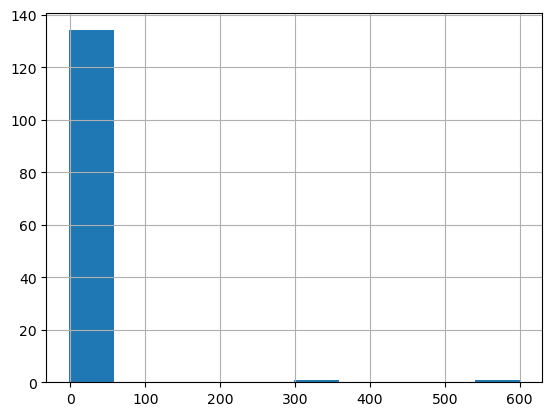

In [14]:
df.Staff.hist()

<Axes: >

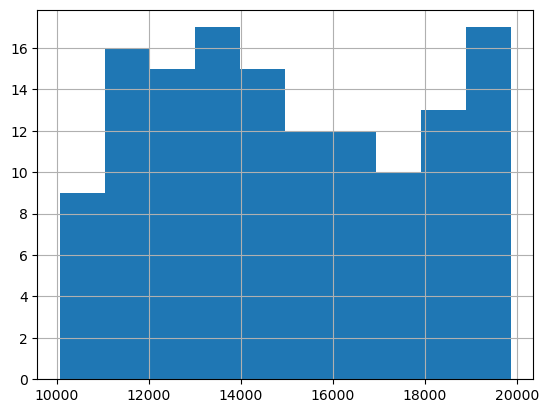

In [15]:
df['Floor Space'].hist()

<Axes: >

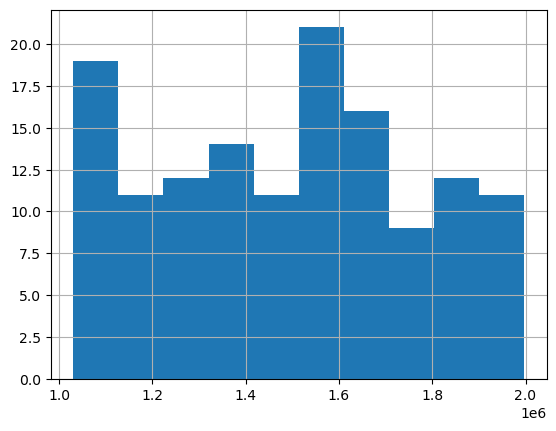

In [16]:
df['40min population'].hist()

<Axes: >

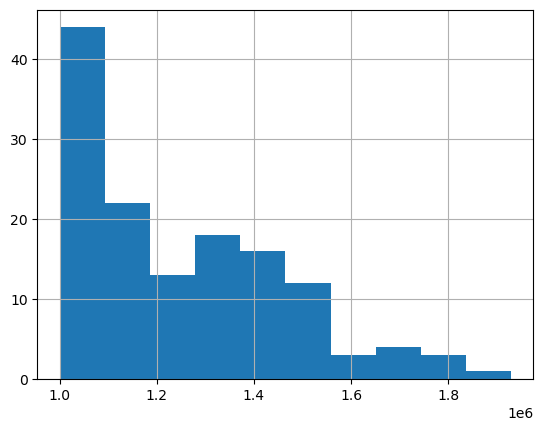

In [17]:
df['30 min population'].hist()

<Axes: xlabel='Count', ylabel='30 min population'>

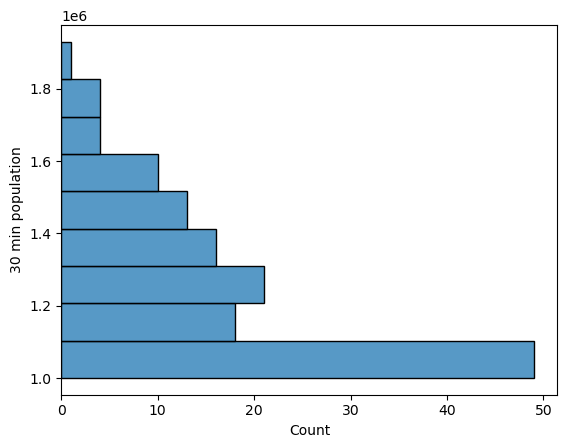

In [18]:
sns.histplot(df, y = '30 min population')

C:\Users\joy\AppData\Local\Temp\ipykernel_7452\69836761.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['30 min population'])


<Axes: xlabel='30 min population', ylabel='Density'>

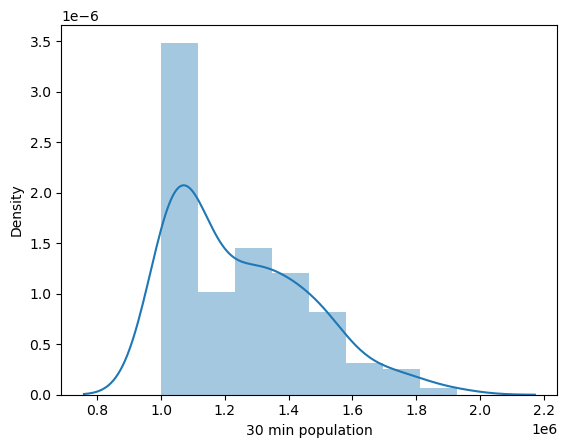

In [19]:
sns.distplot(df['30 min population'])

In [20]:
df.sample(n = 4)

,Town,Country,Store ID,Manager name,Staff,Floor Space,Window,Car park,Demographic score,Location,40min population,30 min population,20 min population,10 min population,Store age,Clearance space,Competition number,Competition score,Performance
116,Stockport,UK,85185,Jade,6,15763,114,Yes,19,Retail Park,1831776,1011411,1004012,1001402,11,323,15,15,Bad
1,Stamford,UK,1544,Ella,8,18569,121,Yes,11,Shopping Centre,1086225,1015321,1012182,1008436,4,384,15,19,Good
11,Staines,UK,7566,Olivia,8,11071,102,No,12,Retail Park,1514670,1400857,1319646,1010879,11,202,15,10,Bad
21,Sudbury,UK,16727,Isabella,7,19025,122,Yes,11,High Street,1817320,1735622,1723395,1272149,11,223,10,17,Good


# Encoding

In [21]:
one_hot = pd.get_dummies(df['Car park'], dtype = int)
one_hot

,No,Yes
0,0,1
1,0,1
2,1,0
3,1,0
4,1,0
...,...,...
131,0,1
132,1,0
133,1,0
134,1,0


In [22]:
df = pd.concat([df, one_hot], axis = 1)

In [23]:
df.drop('Car park', axis = 1, inplace = True)

In [24]:
df.head()

,Town,Country,Store ID,Manager name,Staff,Floor Space,Window,Demographic score,Location,40min population,30 min population,20 min population,10 min population,Store age,Clearance space,Competition number,Competition score,Performance,No,Yes
0,Swinton (Greater Manchester),UK,1437,Roger,9,18526,121,10,Retail Park,1288374,1138224,1006986,1002340,3,238,16,16,Good,0,1
1,Stamford,UK,1544,Ella,8,18569,121,11,Shopping Centre,1086225,1015321,1012182,1008436,4,384,15,19,Good,0,1
2,Skipton,UK,2039,Valentina,-2,12288,105,12,Retail Park,1595638,1281661,1104490,1011395,11,219,13,18,Bad,1,0
3,Stratton,UK,2055,Antonia,7,17092,117,14,High Street,1179395,1022959,1009496,1002169,5,261,15,12,Bad,1,0
4,Shepperton,UK,2141,Gabriel,7,11307,103,18,Retail Park,1398558,1085170,1003137,1002513,7,200,19,13,Bad,1,0


In [25]:
df.Location.unique()

array(['Retail Park', 'Shopping Centre', 'High Street', 'Village'],
      dtype=object)

<Axes: xlabel='Location'>

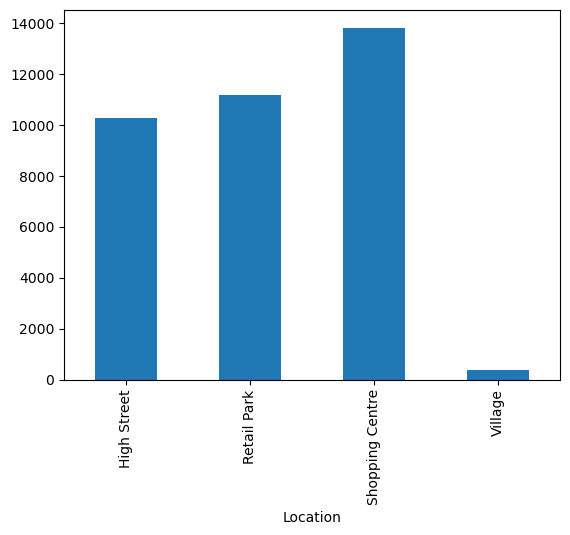

In [26]:
df.groupby('Location')['Clearance space'].sum().plot(kind = "bar")

In [27]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [28]:
df.Location = lb.fit_transform(df.Location)
df.Location

0      1
1      2
2      1
3      0
4      1
      ..
131    1
132    2
133    2
134    0
135    0
Name: Location, Length: 136, dtype: int32

In [29]:
df.head()

,Town,Country,Store ID,Manager name,Staff,Floor Space,Window,Demographic score,Location,40min population,30 min population,20 min population,10 min population,Store age,Clearance space,Competition number,Competition score,Performance,No,Yes
0,Swinton (Greater Manchester),UK,1437,Roger,9,18526,121,10,1,1288374,1138224,1006986,1002340,3,238,16,16,Good,0,1
1,Stamford,UK,1544,Ella,8,18569,121,11,2,1086225,1015321,1012182,1008436,4,384,15,19,Good,0,1
2,Skipton,UK,2039,Valentina,-2,12288,105,12,1,1595638,1281661,1104490,1011395,11,219,13,18,Bad,1,0
3,Stratton,UK,2055,Antonia,7,17092,117,14,0,1179395,1022959,1009496,1002169,5,261,15,12,Bad,1,0
4,Shepperton,UK,2141,Gabriel,7,11307,103,18,1,1398558,1085170,1003137,1002513,7,200,19,13,Bad,1,0


In [30]:
df.Country.unique()

array(['UK', 'France'], dtype=object)

In [31]:
o = pd.get_dummies(df.Country, dtype = int)
o

,France,UK
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
131,0,1
132,0,1
133,0,1
134,0,1


In [32]:
df = pd.concat([df, o], axis = 1)

In [33]:
df.head()

,Town,Country,Store ID,Manager name,Staff,Floor Space,Window,Demographic score,Location,40min population,...,10 min population,Store age,Clearance space,Competition number,Competition score,Performance,No,Yes,France,UK
0,Swinton (Greater Manchester),UK,1437,Roger,9,18526,121,10,1,1288374,...,1002340,3,238,16,16,Good,0,1,0,1
1,Stamford,UK,1544,Ella,8,18569,121,11,2,1086225,...,1008436,4,384,15,19,Good,0,1,0,1
2,Skipton,UK,2039,Valentina,-2,12288,105,12,1,1595638,...,1011395,11,219,13,18,Bad,1,0,0,1
3,Stratton,UK,2055,Antonia,7,17092,117,14,0,1179395,...,1002169,5,261,15,12,Bad,1,0,0,1
4,Shepperton,UK,2141,Gabriel,7,11307,103,18,1,1398558,...,1002513,7,200,19,13,Bad,1,0,0,1


In [34]:
df.drop("Country", axis = 1, inplace = True)

In [35]:
df.head()

,Town,Store ID,Manager name,Staff,Floor Space,Window,Demographic score,Location,40min population,30 min population,...,10 min population,Store age,Clearance space,Competition number,Competition score,Performance,No,Yes,France,UK
0,Swinton (Greater Manchester),1437,Roger,9,18526,121,10,1,1288374,1138224,...,1002340,3,238,16,16,Good,0,1,0,1
1,Stamford,1544,Ella,8,18569,121,11,2,1086225,1015321,...,1008436,4,384,15,19,Good,0,1,0,1
2,Skipton,2039,Valentina,-2,12288,105,12,1,1595638,1281661,...,1011395,11,219,13,18,Bad,1,0,0,1
3,Stratton,2055,Antonia,7,17092,117,14,0,1179395,1022959,...,1002169,5,261,15,12,Bad,1,0,0,1
4,Shepperton,2141,Gabriel,7,11307,103,18,1,1398558,1085170,...,1002513,7,200,19,13,Bad,1,0,0,1


In [36]:
df.Town.nunique()

136

In [37]:
df.drop(["Town", "Store ID", "Manager name"], axis = 1, inplace = True)

In [38]:
df.head()

,Staff,Floor Space,Window,Demographic score,Location,40min population,30 min population,20 min population,10 min population,Store age,Clearance space,Competition number,Competition score,Performance,No,Yes,France,UK
0,9,18526,121,10,1,1288374,1138224,1006986,1002340,3,238,16,16,Good,0,1,0,1
1,8,18569,121,11,2,1086225,1015321,1012182,1008436,4,384,15,19,Good,0,1,0,1
2,-2,12288,105,12,1,1595638,1281661,1104490,1011395,11,219,13,18,Bad,1,0,0,1
3,7,17092,117,14,0,1179395,1022959,1009496,1002169,5,261,15,12,Bad,1,0,0,1
4,7,11307,103,18,1,1398558,1085170,1003137,1002513,7,200,19,13,Bad,1,0,0,1


In [39]:
dc = df[["Staff", "Floor Space", "Window", "Demographic score", "Location", "40min population", "30 min population", "20 min population", "10 min population", "Store age", "Clearance space", "Competition number", "Competition score", "No", "Yes", "France", "UK"]]
dc.head(3)

,Staff,Floor Space,Window,Demographic score,Location,40min population,30 min population,20 min population,10 min population,Store age,Clearance space,Competition number,Competition score,No,Yes,France,UK
0,9,18526,121,10,1,1288374,1138224,1006986,1002340,3,238,16,16,0,1,0,1
1,8,18569,121,11,2,1086225,1015321,1012182,1008436,4,384,15,19,0,1,0,1
2,-2,12288,105,12,1,1595638,1281661,1104490,1011395,11,219,13,18,1,0,0,1


<Axes: >

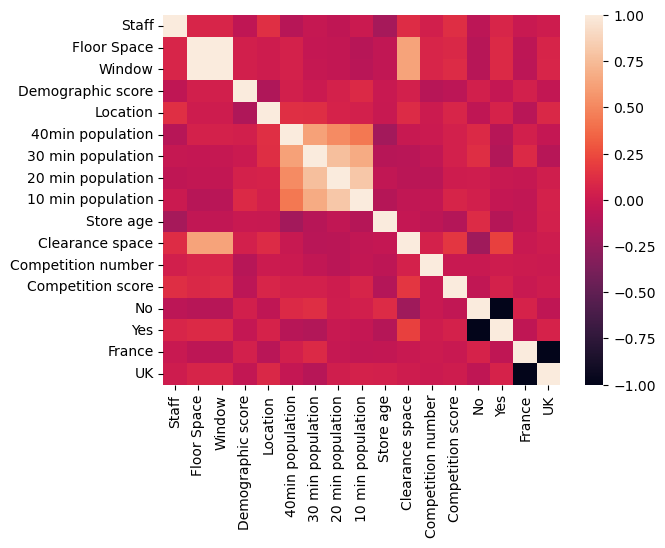

In [40]:
sns.heatmap(dc.corr())

In [41]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df['Performance'] = lb.fit_transform(df.Performance)

In [42]:
df.corr()['Performance'].abs()

Staff                 0.124331
Floor Space           0.267429
Window                0.274381
Demographic score     0.117908
Location              0.350950
40min population      0.099861
30 min population     0.072470
20 min population     0.005909
10 min population     0.001953
Store age             0.034238
Clearance space       0.257304
Competition number    0.209215
Competition score     0.345618
Performance           1.000000
No                    0.173044
Yes                   0.173044
France                0.123979
UK                    0.123979
Name: Performance, dtype: float64

In [43]:
threshold = 0.1
selected_data =  df.corr()["Performance"].abs()[df.corr()["Performance"].abs() >= threshold]
selected_data

Staff                 0.124331
Floor Space           0.267429
Window                0.274381
Demographic score     0.117908
Location              0.350950
Clearance space       0.257304
Competition number    0.209215
Competition score     0.345618
Performance           1.000000
No                    0.173044
Yes                   0.173044
France                0.123979
UK                    0.123979
Name: Performance, dtype: float64

In [44]:
unselected_data = df.corr()["Performance"].abs()[df.corr()["Performance"].abs() <= threshold]
unselected_data

40min population     0.099861
30 min population    0.072470
20 min population    0.005909
10 min population    0.001953
Store age            0.034238
Name: Performance, dtype: float64

In [45]:
type(pd.DataFrame(selected_data))

pandas.core.frame.DataFrame

In [46]:
pd.DataFrame(selected_data).index

Index(['Staff', 'Floor Space', 'Window', 'Demographic score', 'Location',
       'Clearance space', 'Competition number', 'Competition score',
       'Performance', 'No', 'Yes', 'France', 'UK'],
      dtype='object')

In [47]:
selected = ['Staff', 'Floor Space', 'Window', 'Demographic score', 'Location',
       'Clearance space', 'Competition number', 'Competition score',
       'Performance', 'No', 'Yes', 'France', 'UK']

In [48]:
df = df[selected]
df

,Staff,Floor Space,Window,Demographic score,Location,Clearance space,Competition number,Competition score,Performance,No,Yes,France,UK
0,9,18526,121,10,1,238,16,16,1,0,1,0,1
1,8,18569,121,11,2,384,15,19,1,0,1,0,1
2,-2,12288,105,12,1,219,13,18,0,1,0,0,1
3,7,17092,117,14,0,261,15,12,0,1,0,0,1
4,7,11307,103,18,1,200,19,13,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,7,14120,110,13,1,202,18,14,0,0,1,0,1
132,6,11205,103,15,2,203,13,18,0,1,0,0,1
133,7,16190,115,19,2,341,18,18,0,1,0,0,1
134,6,15516,113,17,0,261,14,10,0,1,0,0,1


In [49]:
x = df.drop("Performance", axis = 1)
y = df.Performance

In [50]:
x.head()

,Staff,Floor Space,Window,Demographic score,Location,Clearance space,Competition number,Competition score,No,Yes,France,UK
0,9,18526,121,10,1,238,16,16,0,1,0,1
1,8,18569,121,11,2,384,15,19,0,1,0,1
2,-2,12288,105,12,1,219,13,18,1,0,0,1
3,7,17092,117,14,0,261,15,12,1,0,0,1
4,7,11307,103,18,1,200,19,13,1,0,0,1


In [51]:
y.head()

0    1
1    1
2    0
3    0
4    0
Name: Performance, dtype: int32

In [52]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.7, shuffle = True, random_state = 41)

In [53]:
print(f"The shape of our x_train is {x_train.shape}")
print(f"The shape of our x_test is {x_test.shape}")
print(f"The shape of our y_train is {y_train.shape}")
print(f"The shape of our y_test is {y_test.shape}")

The shape of our x_train is (95, 12)
The shape of our x_test is (41, 12)
The shape of our y_train is (95,)
The shape of our y_test is (41,)


# Model Training

In [54]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [56]:
knn.fit(x_train, y_train)
knn.score(x_train, y_train).round(2)*100

74.0

# Testing

51.0
[[ 9 13]
 [ 7 12]]


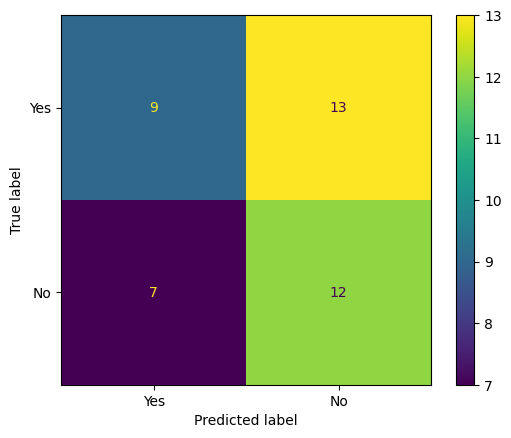

In [58]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
knn.predict(x_test)
print(accuracy_score(y_test, knn.predict(x_test)).round(2) * 100)
print(confusion_matrix(y_test, knn.predict(x_test)))
label = ["Yes", "No"]
ConfusionMatrixDisplay(confusion_matrix(y_test, knn.predict(x_test)), display_labels = label).plot()

# Scaling

In [60]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
x_scaler = mms.fit_transform(x)
x_scaler

array([[0.01827243, 0.86291722, 0.875     , ..., 1.        , 0.        ,
        1.        ],
       [0.0166113 , 0.86730632, 0.875     , ..., 1.        , 0.        ,
        1.        ],
       [0.        , 0.22619169, 0.20833333, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.01495017, 0.62447688, 0.625     , ..., 0.        , 0.        ,
        1.        ],
       [0.01328904, 0.55568031, 0.54166667, ..., 0.        , 0.        ,
        1.        ],
       [0.01827243, 0.44870879, 0.45833333, ..., 1.        , 0.        ,
        1.        ]])

In [61]:
type(x_scaler)

numpy.ndarray

In [62]:
x_scaler = pd.DataFrame(x_scaler, columns = [x.columns])
x_scaler

,Staff,Floor Space,Window,Demographic score,Location,Clearance space,Competition number,Competition score,No,Yes,France,UK
0,0.018272,0.862917,0.875000,0.000000,0.333333,0.182692,0.666667,0.666667,0.0,1.0,0.0,1.0
1,0.016611,0.867306,0.875000,0.111111,0.666667,0.884615,0.555556,1.000000,0.0,1.0,0.0,1.0
2,0.000000,0.226192,0.208333,0.222222,0.333333,0.091346,0.333333,0.888889,1.0,0.0,0.0,1.0
3,0.014950,0.716546,0.708333,0.444444,0.000000,0.293269,0.555556,0.222222,1.0,0.0,0.0,1.0
4,0.014950,0.126059,0.125000,0.888889,0.333333,0.000000,1.000000,0.333333,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
131,0.014950,0.413188,0.416667,0.333333,0.333333,0.009615,0.888889,0.444444,0.0,1.0,0.0,1.0
132,0.013289,0.115648,0.125000,0.555556,0.666667,0.014423,0.333333,0.888889,1.0,0.0,0.0,1.0
133,0.014950,0.624477,0.625000,1.000000,0.666667,0.677885,0.888889,0.888889,1.0,0.0,0.0,1.0
134,0.013289,0.555680,0.541667,0.777778,0.000000,0.293269,0.444444,0.000000,1.0,0.0,0.0,1.0


In [95]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaler,y, shuffle = True, train_size = 0.7, random_state = 41)

In [96]:
print(f"The shape of our x_train is {x_train.shape}")
print(f"The shape of our x_test is {x_test.shape}")
print(f"The shape of our y_train is {y_train.shape}")
print(f"The shape of our y_test is {y_test.shape}")

The shape of our x_train is (95, 12)
The shape of our x_test is (41, 12)
The shape of our y_train is (95,)
The shape of our y_test is (41,)


In [97]:
x_train

,Staff,Floor Space,Window,Demographic score,Location,Clearance space,Competition number,Competition score,No,Yes,France,UK
133,0.014950,0.624477,0.625000,1.000000,0.666667,0.677885,0.888889,0.888889,1.0,0.0,0.0,1.0
129,0.018272,0.000817,0.000000,1.000000,0.333333,0.000000,0.666667,0.888889,0.0,1.0,0.0,1.0
127,0.013289,0.178422,0.166667,0.111111,0.666667,0.052885,0.888889,0.888889,0.0,1.0,0.0,1.0
33,0.016611,0.817087,0.833333,0.666667,0.000000,0.389423,0.000000,0.111111,0.0,1.0,0.0,1.0
125,0.014950,0.633663,0.625000,0.444444,0.666667,0.355769,0.888889,0.555556,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
109,1.000000,0.783097,0.791667,0.444444,0.666667,0.538462,0.666667,0.888889,0.0,1.0,0.0,1.0
26,0.014950,0.381545,0.375000,0.444444,0.000000,0.336538,0.333333,0.777778,0.0,1.0,0.0,1.0
89,0.018272,0.738083,0.750000,0.777778,0.666667,0.658654,0.777778,1.000000,1.0,0.0,0.0,1.0
65,0.016611,0.532816,0.541667,0.666667,0.333333,0.591346,0.666667,0.666667,0.0,1.0,0.0,1.0


# Hyperparameter Tuning

In [101]:
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(x_train, y_train)
round(knn.score(x_train, y_train)*100, 2)

75.79

In [102]:
knn.predict(x_test)

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [103]:
round(accuracy_score(y_test, knn.predict(x_test))*100, 2)

73.17

73.0
[[18  4]
 [ 7 12]]


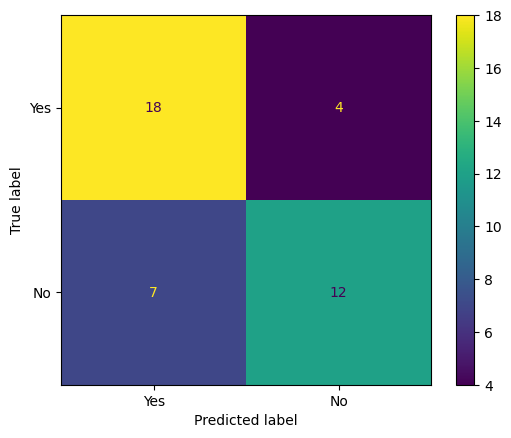

In [105]:
knn.predict(x_test)
print(accuracy_score(y_test, knn.predict(x_test)).round(2) * 100)
print(confusion_matrix(y_test, knn.predict(x_test)))
label = ["Yes", "No"]
ConfusionMatrixDisplay(confusion_matrix(y_test, knn.predict(x_test)), display_labels = label).plot()